In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import requests
from matplotlib import rcParams

In [20]:
def fetchStockData(symbol):
    url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/v3/get-chart"

    querystring = {"interval":"1mo","symbol":symbol,"range":"5y","region":"US","includePrePost":"false","useYfid":"true","includeAdjustedClose":"true","events":"capitalGain,div,split"}
    headers = {
    	"X-RapidAPI-Key": "your rapidAPI-Key",
    	"X-RapidAPI-Host": "apidojo-yahoo-finance-v1.p.rapidapi.com"
    	}

    response = requests.get(url, headers=headers, params=querystring)

    return response
  

In [5]:
def parseTimestamp(inputdata):

  timestamplist = []

  timestamplist.extend(inputdata["chart"]["result"][0]["timestamp"])
  timestamplist.extend(inputdata["chart"]["result"][0]["timestamp"])

  calendertime = []

  for ts in timestamplist:
    dt = datetime.fromtimestamp(ts)
    calendertime.append(dt.strftime("%m/%d/%Y"))

  return calendertime


In [6]:
def parseValues(inputdata):

  valueList = []
  valueList.extend(inputdata["chart"]["result"][0]["indicators"]["quote"][0]["open"])
  valueList.extend(inputdata["chart"]["result"][0]["indicators"]["quote"][0]["close"])

  return valueList


def attachEvents(inputdata):

  eventlist = []

  for i in range(0,len(inputdata["chart"]["result"][0]["timestamp"])):
    eventlist.append("open")	

  for i in range(0,len(inputdata["chart"]["result"][0]["timestamp"])):
    eventlist.append("close")

  return eventlist

In [23]:
symbol_string=[]
while len(symbol_string) <= 2:
      symbol_string = input("Enter the stock symbol: ")

retdata = fetchStockData(symbol_string).json()


Enter the stock symbol:  AAPL


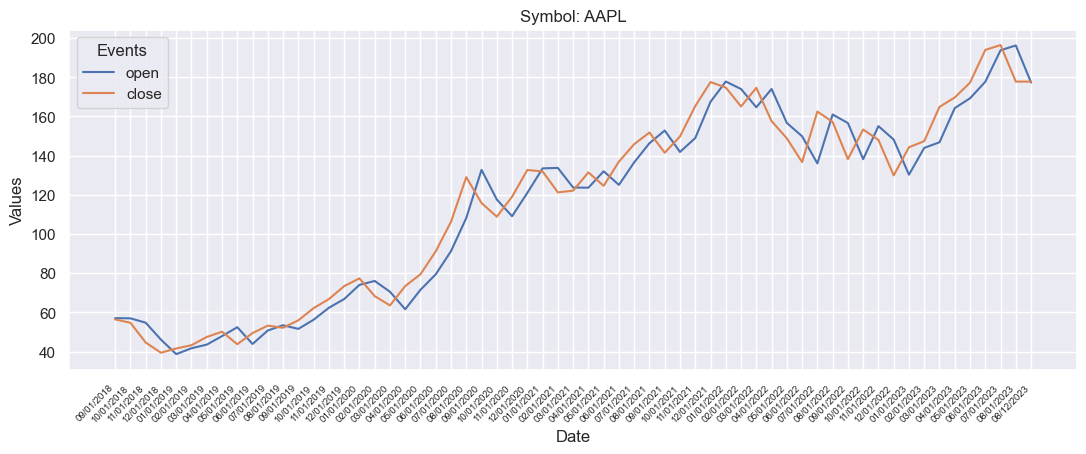

In [30]:
Date = parseTimestamp(retdata)
Values = parseValues(retdata)
Events = attachEvents(retdata)

df = pd.DataFrame([Date, Values, Events])
df = df.transpose()
df.columns = ['Date', 'Values', 'Events']


sns.set(style="darkgrid")

rcParams['figure.figsize'] = 13,5
rcParams['figure.subplot.bottom'] = 0.2


ax = sns.lineplot(x="Date", y="Values", hue="Events",dashes=False, markers=True, 
             data=df, sort=False)


ax.set_title('Symbol: ' + symbol_string)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='xx-small'  
)

plt.show()